
# Exploring Predictors of Titanic Survival Using Logistic Regression

In this notebook, we'll use the Titanic dataset to explore which features best predict whether a passenger survived. We'll focus on **four key features**: **gender**, **passenger class**, **fare paid**, and **age**, and use **logistic regression** to model the probability of survival.

The Titanic dataset is a classic binary classification problem — the outcome variable `survived` is 0 (did not survive) or 1 (survived).


In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Titanic dataset
df = sns.load_dataset('titanic')
df

 

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True



## Cleaning and Preparing the Data

We select relevant columns (features), handle missing values, and convert categorical variables into numeric format to prepare the dataset for logistic regression.


In [7]:
# Keep four relevant columns and the depenedant variable
df = df[['survived', 'pclass', 'sex', 'age', 'fare']]

# Drop rows with missing values
df = df.dropna()

# Convert categorical variable 'sex' to numeric: male = 0, female = 1
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df


,survived,pclass,sex,age,fare
0,0,3,0,22.0,7.2500
1,1,1,1,38.0,71.2833
2,1,3,1,26.0,7.9250
3,1,1,1,35.0,53.1000
4,0,3,0,35.0,8.0500
...,...,...,...,...,...
885,0,3,1,39.0,29.1250
886,0,2,0,27.0,13.0000
887,1,1,1,19.0,30.0000
889,1,1,0,26.0,30.0000



## Visualizing Survival Rates

Let's visualize survival rates by gender and passenger class to build some intuition before modeling.


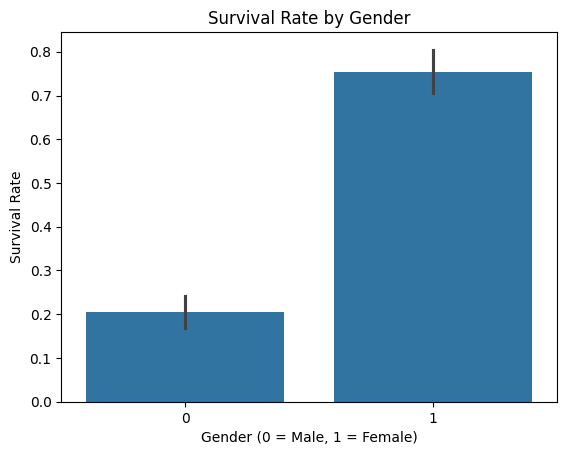

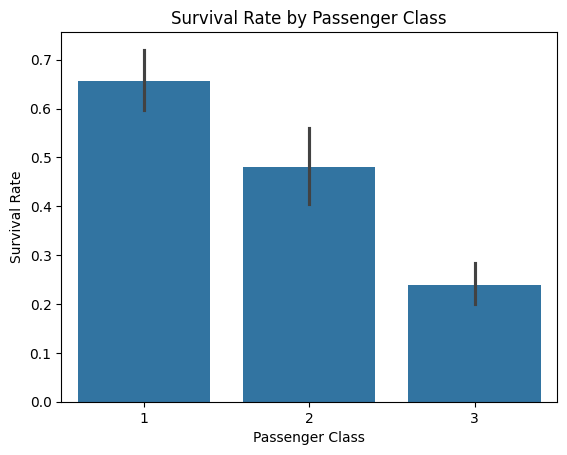

In [8]:

sns.barplot(data=df, x='sex', y='survived')
plt.title("Survival Rate by Gender")
plt.xlabel("Gender (0 = Male, 1 = Female)")
plt.ylabel("Survival Rate")
plt.show()

sns.barplot(data=df, x='pclass', y='survived')
plt.title("Survival Rate by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.show()



## Predictive Analytics using Logistic Regression Model

We now use `scikit-learn`, a machine learning library, to train a logistic regression model. The model learns to predict survival based on four features: **gender**, **passenger class**, **fare paid**, and **age**.


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Define input (X) and output (y) with four features
X = df[['sex', 'pclass', 'fare', 'age']] # independent variables
y = df['survived'] # dependent variable

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # 42 will result in reproducability

# Train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)  # y_hat = predicted values

# Classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.80      0.81      0.80       126
           1       0.72      0.71      0.72        89

    accuracy                           0.77       215
   macro avg       0.76      0.76      0.76       215
weighted avg       0.77      0.77      0.77       215



## Interpreting Predictive Performance Metrics

After training our logistic regression model, we assess its predictive performance using the **classification report**, which provides the following key metrics for each class (0 = did not survive, 1 = survived):

---

###  **Precision**
- Definition: Of all passengers predicted to belong to a class (e.g., survive), how many actually did?
- High precision means fewer **false positives**.
- For class `1`, high precision means the model is trustworthy when it predicts someone **will survive**.

---

###  **Recall**
- Definition: Of all passengers who actually belonged to a class (e.g., survived), how many were correctly predicted?
- High recall means fewer **false negatives**.
- For class `1`, high recall means the model is good at **detecting actual survivors**.

---

###  **F1 Score**
- Definition: The **harmonic mean** of precision and recall.
- It balances both concerns: how many predictions were correct and how many actual cases were captured.
- A high F1 score for class `1` indicates the model is both **accurate and sensitive** in predicting survival.

---

###  **Support**
- Definition: The **number of actual observations** for each class in the test data.
- Helps contextualize performance scores — for example, a high F1 score on class `1` is more meaningful if the support is substantial.
- If class `1` has low support, even a small number of misclassifications could distort metrics.

---

###  Final Takeaway:
Each metric provides a different lens. Together, they help us understand not just how often the model is right, but **how it behaves across classes**, especially for critical outcomes like survival.


In [11]:
# Show model coefficients for the four predictors
coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})
coeff_df


,Feature,Coefficient
0,sex,2.541928
1,pclass,-1.375869
2,fare,-0.003333
3,age,-0.041838


## Interpreting Feature Coefficients

Each logistic regression coefficient represents the **log-odds impact** of that feature on survival.

### Coefficients from our model:

| Feature      | Coefficient | Interpretation                                                                                                |
|--------------|-------------|---------------------------------------------------------------------------------------------------------------|
| `sex`        | +2.54       | Being **female** (sex=1) significantly **increases** the odds of survival.                                    |
| `pclass`     | -1.38       | A **higher class number** (lower class a > B > C) **reduces** survival odds.                                  |
| `fare`       | -0.0033     | Paying more **slightly decreases** survival odds in this dataset (potentially due to correlation with class). |
| `age`        | -0.0418     | Being older **reduces** survival odds slightly.                                                               |

### Key Insight:
The **magnitude** of the coefficient for `sex` (2.54) is the largest. This means **gender is the strongest predictor** of survival among the four features tested.

